In [9]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from scipy.stats import gaussian_kde
import numpy as np

pd.set_option('display.max_columns',None)

In [10]:
# for i in range(1,4,1):
# c = str(4)
# print(c)
# file_name = 'compiled_raw_first_' + c + '.h5'

# df = pd.read_hdf(
#     'predicted_thicknesses/' + file_name,
#     key = 'compiled_raw', mode = 'a'
# )

# print('df loaded')

# glac = gl.coregister_data(str(c))


# df = pd.merge(glac[['RGIId','Thickness']], df, how = 'inner', on = 'RGIId')

# # df = df.drop(df[df['Thickness'] >= 300].index)
# # df = df.drop(df[df['Thickness'] == 267].index)

# # df = df.drop(df[df['Thickness'] == df['Thickness'].min()].index)

# df.to_pickle('quick_pick' + c)
# print('df ' + c + ' saved')
# print('')

In [11]:
ml = []
for i in range(1,25,1):
    ml.append(str(i))

In [12]:
# for i in range(1,5,1):
#     c = str(i)
#     df = pd.read_pickle('quick_pick' + c)

# #     dfr = gl.find_glacier_resid(df)

#     # collect all residuals
#     # dfpbs = df[df['layer architecture'] == '10-5']

#     dfr = gl.find_glacier_resid(df)
#     res_min = pd.DataFrame()
#     res_max = pd.DataFrame()
#     for i in tqdm(df['RGIId'].unique()):
#         dft = df[df['RGIId'] == i]
#         f = gl.find_glacier_resid(dft)
#         rmin = pd.DataFrame(f.min()).T
#         rmax = pd.DataFrame(f.max()).T
#         res_min = pd.concat([res_min, rmin])
#         res_max = pd.concat([res_max, rmax])

#     dfr['log residual'] = dfr['Percent Residual'].apply(
#         lambda row: gl.findlog(row)
#     )



#     variances = gl.find_variances(df,ml)

#     minvar, maxvar = gl.variance_min_max(df, ml)

#     x1 = dfr['Thickness'].astype(float)
#     x2 = res_min['Thickness'].astype(float)
#     y1 = dfr['Percent Residual'].astype(float)
#     y2 = res_max['Percent Residual'].astype(float)
#     y3 = res_min['Percent Residual'].astype(float)

#     plt.scatter(
#         x1,y1,
#         alpha = 0.5,
#         marker = '.',
#         label = 'Percent Residual\n' + r'$\dfrac{\hat{h} - h}{h}$'
#     #     label = 'Percent Residual'
#     )
#     plt.scatter(
#         x2,
#         y2,
#         alpha = 0.5,
#         marker = '.',
#         label = 'Max Percent Residual'
#     )
#     plt.scatter(
#         x2,
#         y3,
#         alpha = 0.5,
#         marker = '.',
#         label = 'Min Percent Residual'
#     )

#     plt.legend()
#     plt.xlabel('GlaThida Thickness (m)')
#     plt.ylabel('Percent Residual (m)')
#     plt.grid()
#     plt.title('Coregistration ' + c + ' Ensemble Percent Residuals')
#     plt.show()
#     # model1 = np.poly1d(np.polyfit(x1, y1, 2))
#     # model2 = np.poly1d(np.polyfit(x2, y2, 2))
#     # model3 = np.poly1d(np.polyfit(x2, y3, 2))
#     # plt.plot(x1,model1(x1),color = 'r',linestyle = '--')
#     # plt.plot(x1,model2(x1),color = 'r')
#     # plt.plot(x1,model3(x1),color = 'r')

#     # xmin, xmax, ymin, ymax = plt.axis()
#     # print(xmin,xmax)
#     # print(ymin,ymax)
#     # plt.xlim(-22.85, 567.85)
#     # plt.ylim(-2.9334176469073263, 34.22000154870684)

#     fig, ax = plt.subplots(2,2,figsize = (10,8))




#     feat = 'Area'
#     res_min = res_min.sort_values(feat, ascending = True)
#     res_max = res_max.sort_values(feat, ascending = True)
#     x = res_min[feat].astype(float)
#     y1 = res_min['Percent Residual'].astype(float)
#     y2 = res_max['Percent Residual'].astype(float)
#     ax[0][0].scatter(
#         dfr[feat],
#         dfr['Percent Residual'],
#         marker = '.',
#         alpha = 0.5,
#         label = 'Percent Residual\n' + r'$\dfrac{\hat{h} - h}{h}$'

#     )
#     ax[0][0].scatter(
#         res_max[feat],
#         res_max['Percent Residual'],
#         marker = '.',
#         alpha = 0.5,
#         label = 'Max Percent Residual'

#     )
#     ax[0][0].scatter(
#         res_min[feat],
#         res_min['Percent Residual'],
#         marker = '.',
#         alpha = 0.5,
#         label = 'Min Percent Residual'
#     )
#     ax[0][0].set_xscale('log')
#     ax[0][0].set_xlabel('Area (km$^2$)')
#     ax[0][0].grid()
#     ax[0][0].legend()

#     feat = 'Lmax'
#     res_min = res_min.sort_values(feat, ascending = True)
#     res_max = res_max.sort_values(feat, ascending = True)
#     x = res_min[feat].astype(float)
#     y1 = res_min['Percent Residual'].astype(float)
#     y2 = res_max['Percent Residual'].astype(float)
#     ax[0][1].scatter(
#         dfr[feat],
#         dfr['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[0][1].scatter(
#         res_max[feat],
#         res_max['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[0][1].scatter(
#         res_min[feat],
#         res_min['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[0][1].set_xlabel('Lmax (m)')
#     ax[0][1].set_xscale('log')
#     ax[0][1].grid()



#     feat = 'Slope'
#     res_min = res_min.sort_values(feat, ascending = True)
#     res_max = res_max.sort_values(feat, ascending = True)
#     x = res_min[feat].astype(float)
#     y1 = res_min['Percent Residual'].astype(float)
#     y2 = res_max['Percent Residual'].astype(float)
#     ax[1][0].scatter(
#         dfr[feat],
#         dfr['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][0].scatter(
#         res_max[feat],
#         res_max['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][0].scatter(
#         res_min[feat],
#         res_min['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][0].set_xlabel('Slope (degrees)')
#     ax[1][0].grid()



#     feat = 'Zmin'
#     res_min = res_min.sort_values(feat, ascending = True)
#     res_max = res_max.sort_values(feat, ascending = True)
#     x = res_min[feat].astype(float)
#     y1 = res_min['Percent Residual'].astype(float)
#     y2 = res_max['Percent Residual'].astype(float)
#     ax[1][1].scatter(
#         dfr[feat],
#         dfr['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][1].scatter(
#         res_max[feat],
#         res_max['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][1].scatter(
#         res_min[feat],
#         res_min['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][1].set_xlabel('Min Elevation(m)')
#     ax[1][1].grid()


#     fig.supylabel('Percent Residual (m)')
#     fig.suptitle('Coregistration ' + c + ' Ensemble Percent Residuals')
#     plt.tight_layout()
#     plt.show()
# # plt.colorbar()


#     x1 = variances['Thickness'].astype(float)
#     x2 = minvar['Thickness'].astype(float)
#     y1 = np.sqrt(variances['Variance'].astype(float))
#     y2 = np.sqrt(maxvar['VarMax'].astype(float))
#     y3 = np.sqrt(minvar['VarMin'].astype(float))

#     plt.scatter(
#         x1,y1,
#         alpha = 0.5,
#         marker = '.',
#         label = '${}^{P}_{}\sigma$'
#     #     label = 'Model Variance'
#     )
#     plt.scatter(
#         x2,
#         y2,
#         alpha = 0.5,
#         marker = '.',
#         label = 'Max ${}^{P}_{}\sigma$'
#     )
#     plt.scatter(
#         x2,
#         y3,
#         alpha = 0.5,
#         marker = '.',
#         label = 'Min ${}^{P}_{}\sigma$'
#     )

#     plt.legend()
#     plt.xlabel('GlaThida Thickness (m)')
#     plt.ylabel('Bootstrap Standard Deviation ${}^{P}_{}\sigma$ (m)')
#     plt.grid()
#     plt.title('Coregistration ' + c + ' Ensemble Standard Deviations')
#     plt.show()


#     fig, ax = plt.subplots(2,2,figsize = (10,8))




#     feat = 'Area'
#     minvar = minvar.sort_values(feat, ascending = True)
#     maxvar = maxvar.sort_values(feat, ascending = True)
#     x = minvar[feat].astype(float)
#     y = np.sqrt(variances['Variance'].astype(float))
#     y1 = np.sqrt(minvar['VarMin'].astype(float))
#     y2 = np.sqrt(maxvar['VarMax'].astype(float))
#     ax[0][0].scatter(
#         variances[feat],
#         y,
#         marker = '.',
#         alpha = 0.5,
#         label = '${}^{P}_{}\sigma$'


#     )
#     ax[0][0].scatter(
#         maxvar[feat],
#         y2,
#         marker = '.',
#         alpha = 0.5,
#         label = 'Max ${}^{P}_{}\sigma$'



#     )
#     ax[0][0].scatter(
#         minvar[feat],
#         y1,
#         marker = '.',
#         alpha = 0.5,
#         label = 'Min ${}^{P}_{}\sigma$'



#     )
#     ax[0][0].set_xlabel('Area (km$^2$)')
#     ax[0][0].set_xscale('log')
#     ax[0][0].grid()
#     ax[0][0].legend()

#     feat = 'Lmax'
#     minvar = minvar.sort_values(feat, ascending = True)
#     maxvar = maxvar.sort_values(feat, ascending = True)

#     x = minvar[feat].astype(float)
#     y = np.sqrt(variances['Variance'].astype(float))
#     y1 = np.sqrt(minvar['VarMin'].astype(float))
#     y2 = np.sqrt(maxvar['VarMax'].astype(float))
#     ax[0][1].scatter(
#         variances[feat],
#         y,
#         marker = '.',
#         alpha = 0.5


#     )
#     ax[0][1].scatter(
#         maxvar[feat],
#         y2,
#         marker = '.',
#         alpha = 0.5


#     )
#     ax[0][1].scatter(
#         minvar[feat],
#         y1,
#         marker = '.',
#         alpha = 0.5


#     )
#     ax[0][1].set_xlabel('Maximum Length (m)')
#     ax[0][1].set_xscale('log')
#     ax[0][1].grid()



#     feat = 'Slope'
#     minvar = minvar.sort_values(feat, ascending = True)
#     maxvar = maxvar.sort_values(feat, ascending = True)
#     x = minvar[feat].astype(float)
#     y = np.sqrt(variances['Variance'].astype(float))
#     y1 = np.sqrt(minvar['VarMin'].astype(float))
#     y2 = np.sqrt(maxvar['VarMax'].astype(float))
#     ax[1][0].scatter(
#         variances[feat],
#         y,
#         marker = '.',
#         alpha = 0.5


#     )
#     ax[1][0].scatter(
#         maxvar[feat],
#         y2,
#         marker = '.',
#         alpha = 0.5


#     )
#     ax[1][0].scatter(
#         minvar[feat],
#         y1,
#         marker = '.',
#         alpha = 0.5

#     )

#     ax[1][0].set_xlabel('Slope (degrees)')
#     ax[1][0].grid()



#     feat = 'Zmin'
#     minvar = minvar.sort_values(feat, ascending = True)
#     maxvar= maxvar.sort_values(feat, ascending = True)
#     x = minvar[feat].astype(float)
#     y = np.sqrt(variances['Variance'].astype(float))
#     y1 = np.sqrt(minvar['VarMin'].astype(float))
#     y2 = np.sqrt(maxvar['VarMax'].astype(float))
#     ax[1][1].scatter(
#         variances[feat],
#         y,
#         marker = '.',
#         alpha = 0.5


#     )
#     ax[1][1].scatter(
#         maxvar[feat],
#         y2,
#         marker = '.',
#         alpha = 0.5


#     )
#     ax[1][1].scatter(
#         minvar[feat],
#         y1,
#         marker = '.',
#         alpha = 0.5


#     )
#     ax[1][1].set_xlabel('Min Elevation(m)')
#     ax[1][1].grid()
    
#     fig.suptitle('Coregistration ' + c + ' Ensemble Standard Deviations')

#     fig.supylabel('Bootstrap Standard Deviation ${}^{P}_{}\sigma$ (m)')
#     plt.tight_layout()
#     plt.show()


In [13]:
# for i in range(1,5,1):
#     c = str(i)
#     df = pd.read_pickle('quick_pick' + c)

# #     dfr = gl.find_glacier_resid(df)

#     # collect all residuals
#     # dfpbs = df[df['layer architecture'] == '10-5']

#     dfr = gl.find_glacier_resid(df)
#     res_min = pd.DataFrame()
#     res_max = pd.DataFrame()
#     for i in tqdm(df['RGIId'].unique()):
#         dft = df[df['RGIId'] == i]
#         f = gl.find_glacier_resid(dft)
#         rmin = pd.DataFrame(f.min()).T
#         rmax = pd.DataFrame(f.max()).T
#         res_min = pd.concat([res_min, rmin])
#         res_max = pd.concat([res_max, rmax])

#     dfr['log residual'] = dfr['Percent Residual'].apply(
#         lambda row: gl.findlog(row)
#     )



#     variances = gl.find_variances(df,ml)

#     minvar, maxvar = gl.variance_min_max(df, ml)

#     x1 = dfr['Thickness'].astype(float)
#     x2 = res_min['Thickness'].astype(float)
#     y1 = dfr['Percent Residual'].astype(float)
#     y2 = res_max['Percent Residual'].astype(float)
#     y3 = res_min['Percent Residual'].astype(float)

#     plt.scatter(
#         x1,y1,
#         alpha = 0.5,
#         marker = '.',
#         label = 'Percent Residual\n' + r'$\dfrac{\hat{h} - h}{h}$'
#     #     label = 'Percent Residual'
#     )
#     plt.scatter(
#         x2,
#         y2,
#         alpha = 0.5,
#         marker = '.',
#         label = 'Max Percent Residual'
#     )
#     plt.scatter(
#         x2,
#         y3,
#         alpha = 0.5,
#         marker = '.',
#         label = 'Min Percent Residual'
#     )

#     plt.legend()
#     plt.xlabel('GlaThida Thickness (m)')
#     plt.ylabel('Percent Residual (m)')
#     plt.grid()
#     plt.title('Coregistration ' + c + ' Ensemble Percent Residuals')
#     plt.show()
#     # model1 = np.poly1d(np.polyfit(x1, y1, 2))
#     # model2 = np.poly1d(np.polyfit(x2, y2, 2))
#     # model3 = np.poly1d(np.polyfit(x2, y3, 2))
#     # plt.plot(x1,model1(x1),color = 'r',linestyle = '--')
#     # plt.plot(x1,model2(x1),color = 'r')
#     # plt.plot(x1,model3(x1),color = 'r')

#     # xmin, xmax, ymin, ymax = plt.axis()
#     # print(xmin,xmax)
#     # print(ymin,ymax)
#     # plt.xlim(-22.85, 567.85)
#     # plt.ylim(-2.9334176469073263, 34.22000154870684)

#     fig, ax = plt.subplots(2,2,figsize = (10,8))




#     feat = 'Area'
#     res_min = res_min.sort_values(feat, ascending = True)
#     res_max = res_max.sort_values(feat, ascending = True)
#     x = res_min[feat].astype(float)
#     y1 = res_min['Percent Residual'].astype(float)
#     y2 = res_max['Percent Residual'].astype(float)
#     ax[0][0].scatter(
#         dfr[feat],
#         dfr['Percent Residual'],
#         marker = '.',
#         alpha = 0.5,
#         label = 'Percent Residual\n' + r'$\dfrac{\hat{h} - h}{h}$'

#     )
#     ax[0][0].scatter(
#         res_max[feat],
#         res_max['Percent Residual'],
#         marker = '.',
#         alpha = 0.5,
#         label = 'Max Percent Residual'

#     )
#     ax[0][0].scatter(
#         res_min[feat],
#         res_min['Percent Residual'],
#         marker = '.',
#         alpha = 0.5,
#         label = 'Min Percent Residual'
#     )
#     ax[0][0].set_xscale('log')
#     ax[0][0].set_xlabel('Area (km$^2$)')
#     ax[0][0].grid()
#     ax[0][0].legend()

#     feat = 'Lmax'
#     res_min = res_min.sort_values(feat, ascending = True)
#     res_max = res_max.sort_values(feat, ascending = True)
#     x = res_min[feat].astype(float)
#     y1 = res_min['Percent Residual'].astype(float)
#     y2 = res_max['Percent Residual'].astype(float)
#     ax[0][1].scatter(
#         dfr[feat],
#         dfr['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[0][1].scatter(
#         res_max[feat],
#         res_max['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[0][1].scatter(
#         res_min[feat],
#         res_min['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[0][1].set_xlabel('Lmax (m)')
#     ax[0][1].set_xscale('log')
#     ax[0][1].grid()



#     feat = 'Slope'
#     res_min = res_min.sort_values(feat, ascending = True)
#     res_max = res_max.sort_values(feat, ascending = True)
#     x = res_min[feat].astype(float)
#     y1 = res_min['Percent Residual'].astype(float)
#     y2 = res_max['Percent Residual'].astype(float)
#     ax[1][0].scatter(
#         dfr[feat],
#         dfr['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][0].scatter(
#         res_max[feat],
#         res_max['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][0].scatter(
#         res_min[feat],
#         res_min['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][0].set_xlabel('Slope (degrees)')
#     ax[1][0].grid()



#     feat = 'Zmin'
#     res_min = res_min.sort_values(feat, ascending = True)
#     res_max = res_max.sort_values(feat, ascending = True)
#     x = res_min[feat].astype(float)
#     y1 = res_min['Percent Residual'].astype(float)
#     y2 = res_max['Percent Residual'].astype(float)
#     ax[1][1].scatter(
#         dfr[feat],
#         dfr['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][1].scatter(
#         res_max[feat],
#         res_max['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][1].scatter(
#         res_min[feat],
#         res_min['Percent Residual'],
#         marker = '.',
#         alpha = 0.5
#     )
#     ax[1][1].set_xlabel('Min Elevation(m)')
#     ax[1][1].grid()


#     fig.supylabel('Percent Residual (m)')
#     fig.suptitle('Coregistration ' + c + ' Ensemble Percent Residuals')
#     plt.tight_layout()
#     plt.show()
# # plt.colorbar()


#     x1 = variances['Thickness'].astype(float)
#     x2 = minvar['Thickness'].astype(float)
#     y1 = np.sqrt(variances['Variance'].astype(float))
#     y2 = np.sqrt(maxvar['VarMax'].astype(float))
#     y3 = np.sqrt(minvar['VarMin'].astype(float))

#     plt.scatter(
#         x1,y1,
#         alpha = 0.5,
#         marker = '.',
#         label = '${}^{P}_{}\sigma$'
#     #     label = 'Model Variance'
#     )
#     plt.scatter(
#         x2,
#         y2,
#         alpha = 0.5,
#         marker = '.',
#         label = 'Max ${}^{P}_{}\sigma$'
#     )
#     plt.scatter(
#         x2,
#         y3,
#         alpha = 0.5,
#         marker = '.',
#         label = 'Min ${}^{P}_{}\sigma$'
#     )

#     plt.legend()
#     plt.xlabel('GlaThida Thickness (m)')
#     plt.ylabel('Bootstrap Standard Deviation ${}^{P}_{}\sigma$ (m)')
#     plt.grid()
#     plt.title('Coregistration ' + c + ' Ensemble Standard Deviations')
#     plt.show()



    
#     fig.suptitle('Coregistration ' + c + ' Ensemble Standard Deviations')

#     fig.supylabel('Bootstrap Standard Deviation ${}^{P}_{}\sigma$ (m)')
#     plt.tight_layout()
#     plt.show()


100%|██████████| 304/304 [00:08<00:00, 37.22it/s]


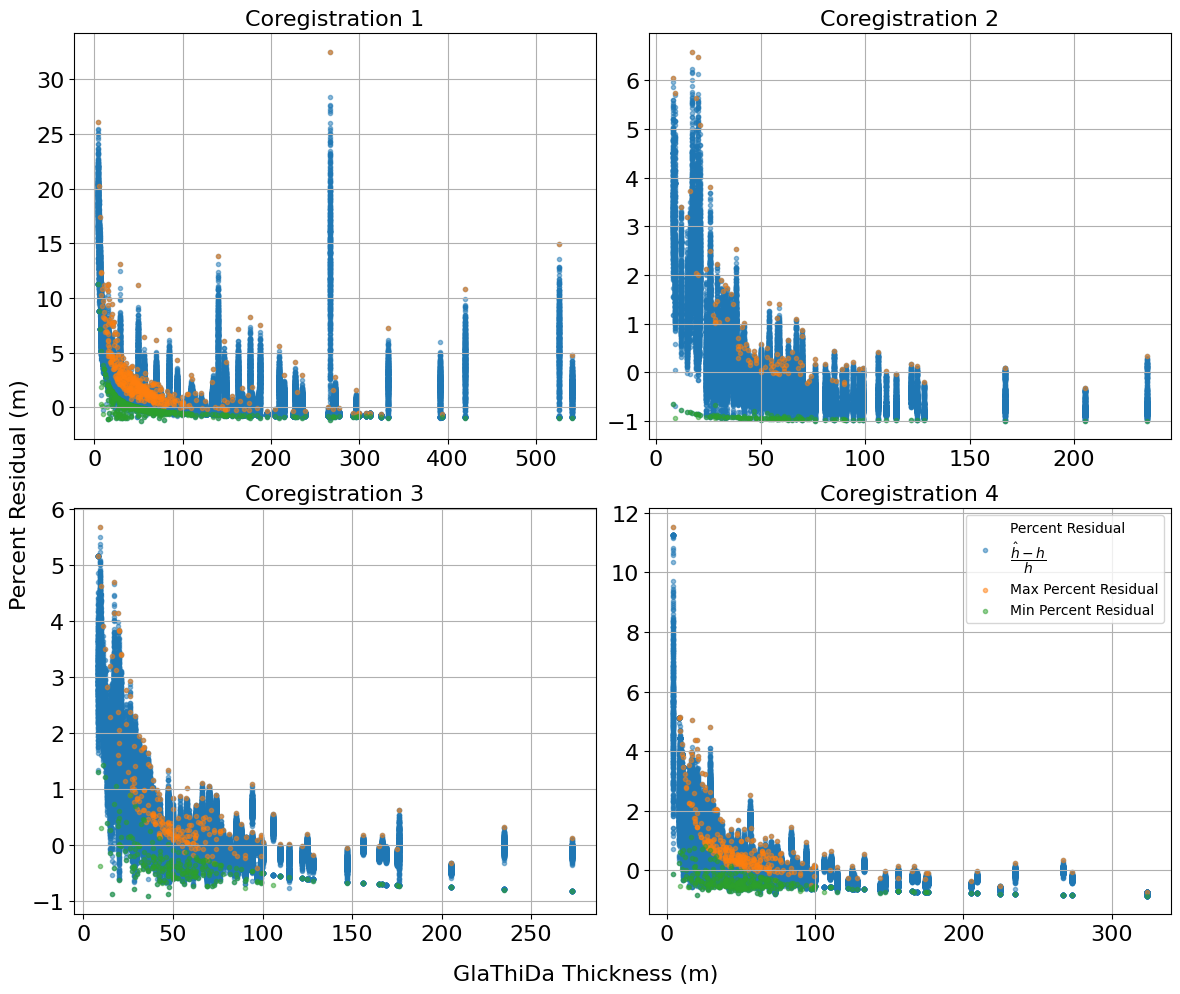

In [14]:
fig, ax = plt.subplots(2,2,figsize = (12,10))
for i in range(1,5,1):
    c = str(i)
    if c == '1':
        axes = ax[0][0]
    if c == '2':
        axes = ax[0][1]
    if c == '3':
        axes = ax[1][0]
    if c == '4':
        axes = ax[1][1]

    df = pd.read_pickle('quick_pick' + c)

    dfr = gl.find_glacier_resid(df)
    res_min = pd.DataFrame()
    res_max = pd.DataFrame()
    for i in tqdm(df['RGIId'].unique()):
        dft = df[df['RGIId'] == i]
        f = gl.find_glacier_resid(dft)
        rmin = pd.DataFrame(f.min()).T
        rmax = pd.DataFrame(f.max()).T
        res_min = pd.concat([res_min, rmin])
        res_max = pd.concat([res_max, rmax])

    x1 = dfr['Thickness'].astype(float)
    x2 = res_min['Thickness'].astype(float)
    y1 = dfr['Percent Residual'].astype(float)
    y2 = res_max['Percent Residual'].astype(float)
    y3 = res_min['Percent Residual'].astype(float)
    axes.scatter(
        x1,y1,
        alpha = 0.5,
        marker = '.',
        label = 'Percent Residual\n' + r'$\dfrac{\hat{h} - h}{h}$'
    #     label = 'Percent Residual'
    )
    axes.scatter(
        x2,
        y2,
        alpha = 0.5,
        marker = '.',
        label = 'Max Percent Residual'
    )
    axes.scatter(
        x2,
        y3,
        alpha = 0.5,
        marker = '.',
        label = 'Min Percent Residual'
    )

#     axes.legend()
#     axes.set_xlabel('GlaThida Thickness (m)')
#     axes.set_ylabel('Percent Residual (m)')
    axes.grid()
    axes.set_title('Coregistration ' + c,fontsize = 16)
    fig.supylabel('Percent Residual (m)',fontsize = 16)
    fig.supxlabel('GlaThiDa Thickness (m)',fontsize = 16)
    axes.tick_params(axis="both", labelsize=16)
    axes.tick_params(axis="both", labelsize=16)
#         plt.show()
plt.tight_layout()
ax[1][1].legend()

100%|██████████| 304/304 [00:03<00:00, 91.11it/s]


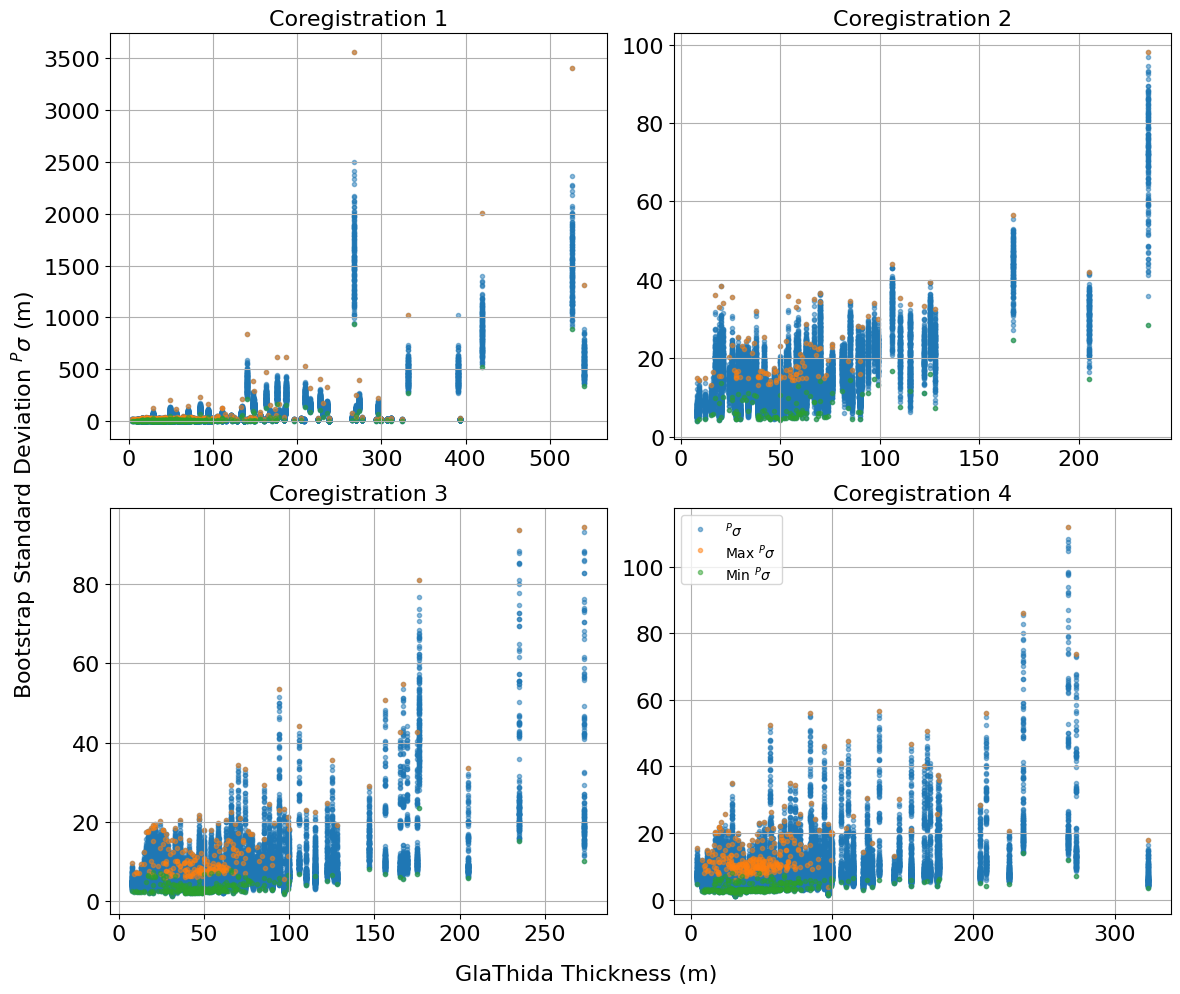

In [15]:
fig, ax = plt.subplots(2,2,figsize = (12,10))
for i in range(1,5,1):
    c = str(i)
    if c == '1':
        axes = ax[0][0]
    if c == '2':
        axes = ax[0][1]
    if c == '3':
        axes = ax[1][0]
    if c == '4':
        axes = ax[1][1]
    df = pd.read_pickle('quick_pick' + c)
    variances = gl.find_variances(df,ml)

    minvar, maxvar = gl.variance_min_max(df, ml)

    x1 = variances['Thickness'].astype(float)
    x2 = minvar['Thickness'].astype(float)
    y1 = np.sqrt(variances['Variance'].astype(float))
    y2 = np.sqrt(maxvar['VarMax'].astype(float))
    y3 = np.sqrt(minvar['VarMin'].astype(float))
    axes.scatter(
        x1,y1,
        alpha = 0.5,
        marker = '.',
        label = '${}^{P}_{}\sigma$'    
        #     label = 'Percent Residual'
    )
    axes.scatter(
        x2,
        y2,
        alpha = 0.5,
        marker = '.',
        label = 'Max ${}^{P}_{}\sigma$'
    )
    axes.scatter(
        x2,
        y3,
        alpha = 0.5,
        marker = '.',
        label = 'Min ${}^{P}_{}\sigma$'
    )

#     axes.legend()
    fig.supxlabel('GlaThida Thickness (m)',fontsize = 16)
#     axes.set_ylabel('Percent Residual (m)')
    axes.grid()
    axes.set_title('Coregistration ' + c,fontsize = 16)
    
    axes.tick_params(axis="both", labelsize=16)
    axes.tick_params(axis="both", labelsize=16)
#     fig.suptitle('Coregistration ' + c + ' Ensemble Standard Deviations')
    fig.supylabel('Bootstrap Standard Deviation ${}^{P}_{}\sigma$ (m)',fontsize = 16)
#         plt.show()
plt.tight_layout()
ax[1][1].legend()

In [16]:
# x = (dfr['Percent Residual'])
# from matplotlib.patches import Rectangle

# # fig,ax = plt.subplots()
# # plt.xscale('log')
# # bins = np.logspace(findlog(np.min((x))), np.log10(np.max((x))), 25)
# plt.hist(
#     x,bins=25,log=True
# )
# # plt.xscale('symlog')
# mean = np.mean(x)
# plt.plot(
#     (mean,mean),
#     (0,5000),
#     linestyle = '--',
#     color = 'k',
#     alpha = 0.75,
#     label = 'Mean'
# )
# q75 = np.percentile(x, 75)
# # plt.plot(
# #     (q75,q75),
# #     (0,5000),
# #     linestyle = '-',
# #     color = 'k',
# #     alpha = 0.75,
# # #     label = 'Mean'
# # )
# # plt.text(
# #     q75+5,5000,'Q75'
# # )
# q25 = np.percentile(x, 25)
# # plt.plot(
# #     (q25,q25),
# #     (0,5000),
# #     linestyle = '-',
# #     color = 'k',
# #     alpha = 0.75
# # )
# # plt.text(
# #     q25-75,5000,'Q25'
# # )
# plt.gca().add_patch(Rectangle((q25, 0), q75 - q25, 5000,
# #              edgecolor = 'pink',
#              facecolor = 'k',
#                        alpha = 0.25,
#              fill=True,
#                label = 'IQR',
#              lw=5))
# # ax.add_patch(Rectangle((q25, 0), q75 - q25, 5000,
# # #              edgecolor = 'pink',
# #              facecolor = 'k',
# #                        alpha = 0.25,
# #              fill=True,
# #                label = 'IQR',
# #              lw=5))
# plt.legend()
# plt.xlabel('Percent Residual = ' + r'$\dfrac{\left(\hat{h} - h\right)}{h}$')
# plt.ylabel('Percent Residual Frequency')
# plt.title('Layer Architecture 10-5')
# IQR = q75 - q25
# print(f'mean = {mean}')
# print(f'IQR = {IQR}')


# # plt.xlim(0,5000)